Importing all required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier 
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import roc_auc_score, confusion_matrix, accuracy_score, classification_report
import pickle
import os
import glob
import seaborn as sns
import lightgbm as lgb
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import CategoricalNB
from sklearn import preprocessing
from sklearn.utils import class_weight
from sklearn.model_selection import cross_val_score,StratifiedKFold
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler,MinMaxScaler

In [39]:
pip install xgboost==0.90

Note: you may need to restart the kernel to use updated packages.


In [40]:
pip install openpyxl

Note: you may need to restart the kernel to use updated packages.


Collecting and merging the Data


In [2]:
i = 1
frames = []
for name in os.listdir('/home/pankaj_v/Documents/Data_analysis_dixit/dATA/client_data'):
    extents = os.path.splitext('/home/pankaj_v/Documents/Data_analysis_dixit/dATA/client_data'+'/{}'.format(name))[1].lower()
    if extents == '.csv':
        df = pd.read_csv('/home/pankaj_v/Documents/Data_analysis_dixit/dATA/client_data/{}'.format(name))
        print({name},df.columns[-1], df.shape)
        frames.append(df)
    if extents == '.xlsx':
        df= pd.read_excel('/home/pankaj_v/Documents/Data_analysis_dixit/dATA/client_data/{}'.format(name))
        df.columns = df.columns.astype(str)
        frames.append(df)
        print({name},df.shape, df.columns[-1], df.shape)

result =  pd.concat(frames, axis=0, ignore_index= False)

{'27-06-2022-09-57-30.csv'} Unnamed: 1059 (24, 1060)
{'29-06-2022-02-45-53.csv'} Unnamed: 1059 (16, 1060)
{'24-06-2022-10-27-46.csv'} Unnamed: 1059 (72, 1060)
{'29-06-2022-02-00-08.csv'} Unnamed: 1059 (48, 1060)
{'21-06-2022-01-05-54.csv'} Unnamed: 1059 (78, 1060)
{'17-06-2022-09-15-43.csv'} Unnamed: 1059 (191, 1060)
{'20-06-2022-09-28-42.csv'} 985.082 (132, 1059)
{'06-06-2022-01-18-32.csv'} Unnamed: 1059 (224, 1060)
{'24-06-2022-10-04-49.csv'} Unnamed: 1059 (18, 1060)
{'01-07-2022-10-40-27.csv'} Unnamed: 1059 (160, 1060)
{'15-06-2022-11-41-28.csv'} Unnamed: 1059 (42, 1060)
{'15-06-2022-09-22-29.csv'} Unnamed: 1059 (142, 1060)
{'24-06-2022-11-09-58.csv'} Unnamed: 1059 (154, 1060)
{'17-06-2022-10-46-40.csv'} Unnamed: 1059 (186, 1060)
{'23-06-2022-11-41-47.csv'} Unnamed: 1059 (29, 1060)
{'29-06-2022-02-55-42.csv'} Unnamed: 1059 (120, 1060)
{'14-06-2022-02-39-44.csv'} Unnamed: 1059 (80, 1060)
{'23-06-2022-12-01-36.csv'} Unnamed: 1059 (28, 1060)
{'01-07-2022-01-53-38.csv'} Unnamed: 1059 (2

In [1111]:
# result.to_excel('/home/pankaj_v/Downloads/whole_data.xlsx')

In [3]:
result.rename(columns = {' ': 'Output'}, inplace=True)

In [4]:
result_3 =result.loc[:,'Output']
result_2= result.loc[:,'195.462':'985.082']
result_1= result.iloc[:,1:14]

In [1237]:
print(result_2.shape, result_3.shape)

(5592, 1044) (5592,)


In [5]:
df = pd.concat([result_1,result_2,result_3], axis=1)

In [ ]:
# df.to_excel('/home/pankaj_v/Documents/Data_analysis_dixit/dATA/Processed_data/whole_data.xlsx')

Data preprocessing

In [6]:
df_without_calb = df[~df['Output'].str.contains(('Calibration|CALIBARTION|CALIBARATION'),case=False, regex=True, na = False)]
df_without_calb.reset_index()
df_without_calb['w/f']= df_without_calb['Output'].str.split('_').str[0]

In [7]:
df_with_w = df_without_calb[df_without_calb['w/f'] == 'W']


In [8]:
df_with_w['quality'] = df_with_w['Output'].str.split('_').str[3]
df_with_w['quality'].replace({'brown':'None','Pink':'None', 'LB':'None','LB ':'None', 'Faint YELLOW':'Faint', 'Faint YELLOW':'Faint', 'Faint GREEN':'Faint','  ':'None', 'BROWN':'Faint', 'Lblack':'Faint', 'lb ':'None','Black':'None'}, inplace = True)

df_with_w['color'] = df_with_w['Output'].str.split('_').str[2]
df_with_w['color'].replace({'E LB':'E','F/LB':'F','G/LB':'G','E/LB':'E', ' K':'K', 'G LB ':'G', 'H ':'H'}, inplace = True)


In [1068]:
df_without_calb['quality'] = df_without_calb['Output'].str.split('_').str[3]
df_without_calb['quality'].replace({'brown':'None','Pink':'None', 'LB':'None','LB ':'None', 'Faint YELLOW':'Faint', 'Faint YELLOW':'Faint', 'Faint GREEN':'Faint','  ':'None', 'BROWN':'Faint', 'Lblack':'Faint', 'lb ':'None','Black':'None'}, inplace = True)
df_without_calb['w/f'].replace({'W':1,'F':0}, inplace = True)
df_without_calb['color'] = df_without_calb['Output'].str.split('_').str[2]
df_without_calb['color'].replace({'F/LB':'F','G/LB':'G','E LB':'E', ' K':'K', 'G LB ':'G', 'H ':'H'}, inplace = True)

In [15]:
# Seperating Data with quality
df_without_calb_None  = df_with_w[df_with_w['quality'] == 'None']
df_without_calb_faint  = df_with_w[df_with_w['quality'] == 'Faint']
df_without_calb_medium  = df_with_w[df_with_w['quality'] == 'Medium']
df_without_calb_verystroong  = df_with_w[df_with_w['quality'] == 'Very Strong']
df_without_calb_strong = df_with_w[df_with_w['quality'] == 'Strong']

In [16]:
df_without_calb_None.reset_index(drop= True,inplace = True)

In [18]:
df_without_calb_None.drop(index=[232], inplace=True)

In [19]:
df_without_calb_None['color'].value_counts()

G    215
F    166
D    161
H    137
E    123
I    114
J     59
K     58
Name: color, dtype: int64

Creating subset of important features and removing Outliers and checking with boxplot

In [24]:
data1 = pd.concat([df_without_calb_None.iloc[:,:13],df_without_calb_None.loc[:,'363.707':'423.503'], df_without_calb_None.iloc[:,-1]], axis=1)

In [25]:
data1.columns

Index(['L*', 'a*', 'b*', 'X', 'Y', 'Z', 'Dominant Wavelenght', 'Whiteness',
       'Purity', 'Tint', 'Chroma', 'Hue', 'Color Temperature', '363.707',
       '364.486', '365.266', '366.044', '366.823', '367.602', '368.381',
       '369.16', '369.938', '370.717', '371.496', '372.274', '373.052',
       '373.831', '374.609', '375.387', '376.165', '376.943', '377.721',
       '378.499', '379.277', '380.055', '380.833', '381.61', '382.388',
       '383.165', '383.943', '384.72', '385.498', '386.275', '387.052',
       '387.829', '388.606', '389.383', '390.16', '390.937', '391.714',
       '392.49', '393.267', '394.044', '394.82', '395.596', '396.373',
       '397.149', '397.925', '398.702', '399.478', '400.254', '401.03',
       '401.806', '402.581', '403.357', '404.133', '404.908', '405.684',
       '406.459', '407.235', '408.01', '408.786', '409.561', '410.336',
       '411.111', '411.886', '412.661', '413.436', '414.211', '414.985',
       '415.76', '416.535', '417.309', '418.084', '418.

In [27]:
for cl in data1.iloc[:,:-1].columns:
    data1.drop(index = data1[cl].idxmax(), inplace=True)
    data1.drop(index=data1[cl].idxmin(), inplace=True)

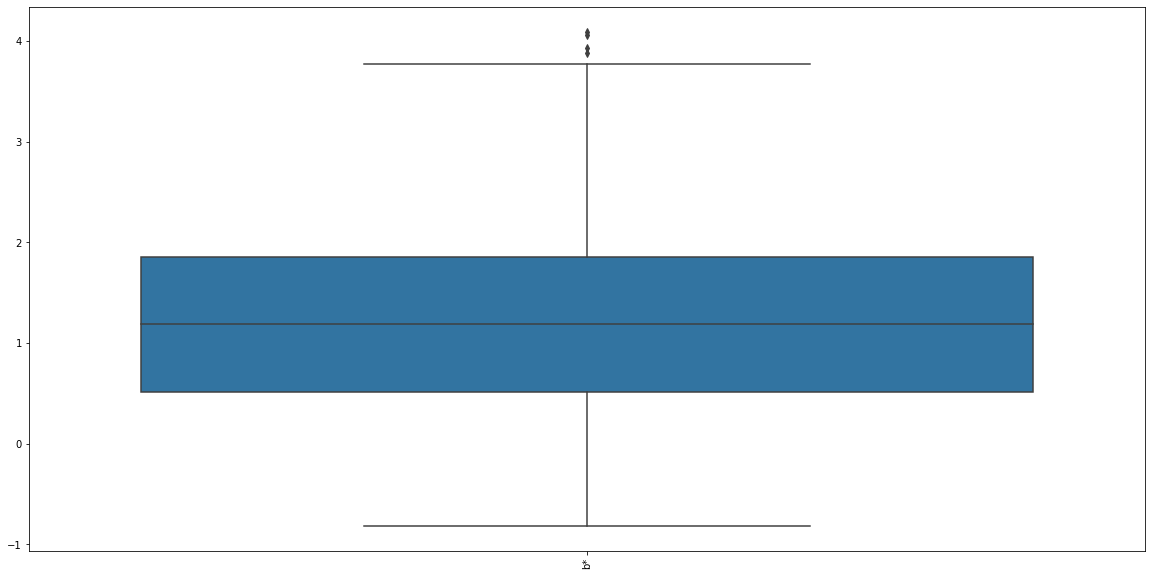

In [42]:
plt.figure(figsize=(20,10))
sns.boxplot(data = data1.iloc[:,:])
plt.xticks(rotation = 90)
plt.show()

Plotting lineplot of colorwise values of none qualities

In [43]:
plt.figure(figsize=(20,10))
data2 = data1.iloc[:,:13].set_index(["color"]).T
g1 = sns.lineplot(data=data2, ci=99)
# g1.set(xticklabels=[data1.columns])
g1.set_title('None Quality vs differnt colors')
plt.xticks(rotation = 90)
plt.show()

KeyError: "None of ['color'] are in the columns"

<Figure size 1440x720 with 0 Axes>

In [53]:
encoder = LabelEncoder()
df_without_calb_None.iloc[:,-1] = encoder.fit_transform(Y)

Creating Datasets for Training and Testing

In [1339]:
data1.shape

(759, 79)

In [1340]:
X = data1.iloc[:,:-1]
Y = data1.iloc[:,-1]

In [1341]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, random_state =42, stratify = Y)

In [1342]:
print(X_train.shape,X_test.shape)

(607, 78) (152, 78)


Creating Stratified K Folds  

In [1344]:
skf =StratifiedKFold(n_splits=5, random_state=42, shuffle=True)

Calculating Weights for each class


In [1343]:
balanced = class_weight.compute_class_weight(class_weight='balanced', classes=data1['color'].value_counts().keys(),y=Y)
balanced = dict(zip(data1['color'].value_counts().keys(),balanced))
balanced

{'G': 0.6520618556701031,
 'F': 0.8547297297297297,
 'H': 1.0541666666666667,
 'D': 1.0541666666666667,
 'E': 1.1294642857142858,
 'I': 1.9461538461538461}

Applying Random Forest

In [946]:
forest = RandomForestClassifier(class_weight = balanced, oob_score=True)
params = {
    'max_depth': [*range(1, 10)],
    'min_samples_leaf': [*range(1,10,1)],
    'max_features': [*range(35,45,1)],
    'n_estimators': [*range(200, 210, 1)],
    'max_leaf_nodes': [*range(180, 220, 3)],
    'min_samples_split':[2,3,4,5,6]
    }

rand_foresr_CV = RandomizedSearchCV(et, param_distributions=params , cv = skf, n_iter=50)

In [1363]:

clf = rand_foresr_CV.fit(x_train, Y_train)

In [866]:
et = rand_foresr_CV.best_estimator_

In [938]:
pd.DataFrame(clf.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,2.999032,0.069239,0.029705,0.001621,{},0.542553,0.530249,0.55516,0.508897,0.533808,0.534133,0.015265,1


Applying Extra Trees Classifier

In [976]:
# min_samples_leaf= 1,n_estimators=300,warm_start=True, max_features = 2,criterion = 'entropy',random_state=42, max_depth=15,bootstrap=True, max_samples=140

In [1346]:
et = ExtraTreesClassifier(max_depth=14, min_samples_leaf = 2, max_features='sqrt')
params = {
    # 'max_depth': [*range(10, 25)],
    # 'min_samples_leaf': [*range(1,10,1)],
    # 'max_features': [*range(1,10,1)],
    # 'n_estimators': [*range(90, 120, 2)],
    # 'max_leaf_nodes': [*range(50, 200, 10)],
    # 'min_samples_split':[2,3,4,5,6]
    }


Extra_tress = RandomizedSearchCV(et, param_distributions=params, cv = skf)

In [1356]:
pca = PCA(n_components=5)

In [1357]:
x_train = pca.fit_transform(X_train)

In [1361]:
Extra_tress.fit(x_train, Y_train)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
                   estimator=ExtraTreesClassifier(max_depth=14,
                                                  min_samples_leaf=2),
                   param_distributions={})

In [1362]:
pd.DataFrame(Extra_tress.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.110753,0.004023,0.010757,0.000629,{},0.459016,0.57377,0.46281,0.520661,0.528926,0.509037,0.043267,1


Training The Model

In [1355]:
lst_accu_stratified = []
lst_accu_stratified_train = []
for train_index, test_index in skf.split(X_train, Y_train):
    x_train_fold, x_test_fold = X_train.iloc[train_index], X_train.iloc[test_index]
    y_train_fold, y_test_fold = Y_train.iloc[train_index], Y_train.iloc[test_index]
    
    pca = PCA(n_components=5)
    x_train_fold = pca.fit_transform(x_train_fold)
    x_test_fold = pca.transform(x_test_fold)
    # print(x_train_fold.shape, x_test_fold.shape)

    # fitting the model on training dataset in K fold
    et.fit(x_train_fold, y_train_fold)
        
    # Predicting values
    Y_pred = et.predict(x_test_fold)
    # print(classification_report(y_test_fold, Y_pred))
    lst_accu_stratified.append(et.score(x_test_fold, y_test_fold))
    lst_accu_stratified_train.append(et.score(x_train_fold, y_train_fold))

# Printing accuracies
print('List of possible accuracy:', lst_accu_stratified)
print('List of possible accuracy train:', lst_accu_stratified_train)
print('\nOverall Accuracy:', np.mean(lst_accu_stratified)*100, '%')
print('\nOverall Accuracy train:', np.mean(lst_accu_stratified_train)*100, '%')

List of possible accuracy: [0.5327868852459017, 0.5983606557377049, 0.47107438016528924, 0.5206611570247934, 0.5867768595041323]
List of possible accuracy train: [0.934020618556701, 0.9463917525773196, 0.9238683127572016, 0.9197530864197531, 0.9279835390946503]

Overall Accuracy: 54.19319875355644 %

Overall Accuracy train: 93.04034618811251 %


In [705]:
pickle.dump(et, open('/home/pankaj_v/Documents/Data_analysis_dixit/Models/extra_trees_pca.pkl', 'wb'))

Predicting on test dataset

In [881]:
pca = PCA(n_components=5)
x_test = pca.fit_transform(X_test)

In [882]:
y_preds = et.predict(X_test)

In [883]:
print(classification_report(y_preds, Y_test))

              precision    recall  f1-score   support

           D       0.66      0.75      0.70        44
           E       0.63      0.48      0.55        56
           F       0.49      0.52      0.50        56
           G       0.60      0.39      0.48       122
           H       0.09      0.19      0.12        21
           I       0.29      0.31      0.30        39
           J       0.18      0.29      0.22        14
           K       0.00      0.00      0.00         0

    accuracy                           0.45       352
   macro avg       0.37      0.37      0.36       352
weighted avg       0.51      0.45      0.47       352

